In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4857377, 8)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3613769, 8)

### Dropped all null rows

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


Text(0, 0.5, '$ Price')

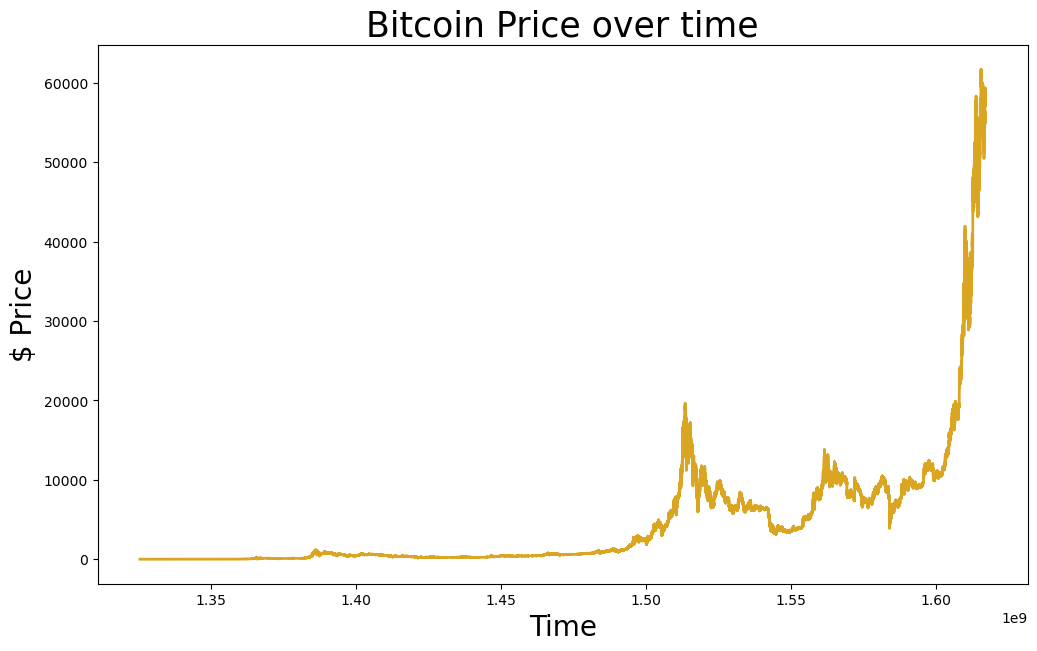

In [10]:
plt.figure(figsize = (12, 7))
plt.plot(df["Timestamp"], df["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

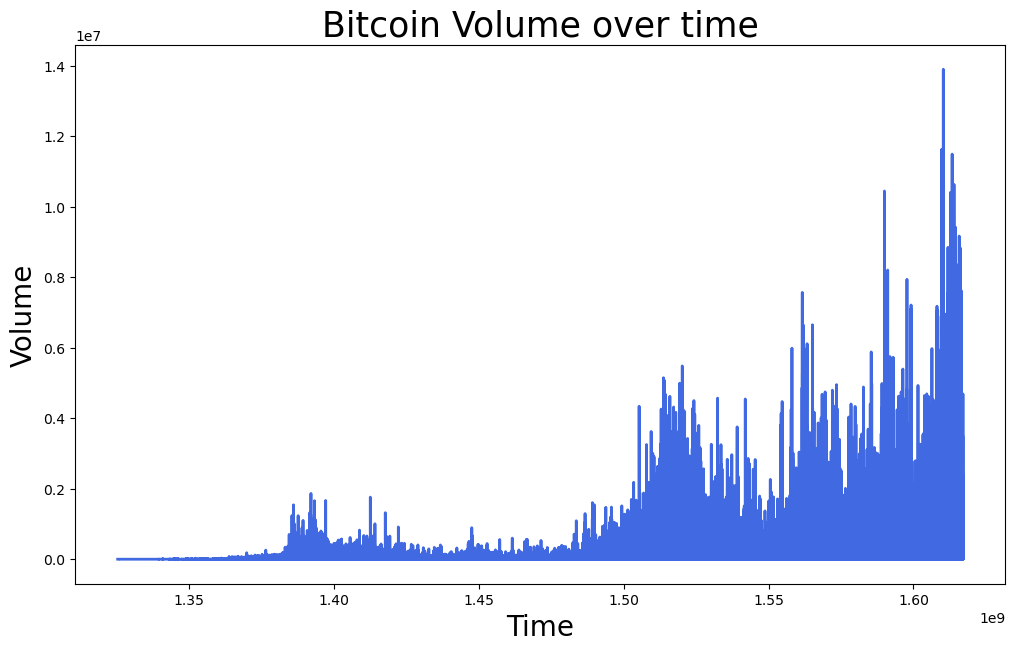

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(df["Timestamp"], df["Volume_(Currency)"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20)

## Creating new Dates column using time stamp

In [13]:
df["Dates"] = pd.to_datetime(df["Timestamp"], unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [14]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df[required_features], df[output_label], test_size = 0.3, random_state=100)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.score(x_test, y_test)

0.9999993622455842

In [18]:
import statsmodels.api as sm

In [32]:
x_train_lm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train,x_train_lm ).fit()

In [33]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.588e+11
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:32:27   Log-Likelihood:            -8.5804e+06
No. Observations:             2529638   AIC:                         1.716e+07
Df Residuals:                 2529631   BIC:                         1.716e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0055      0.00

In [39]:
y_train_pred = model_sm.predict(x_train_lm)

C:\Users\milan\AppData\Local\Temp\ipykernel_34852\4187699577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

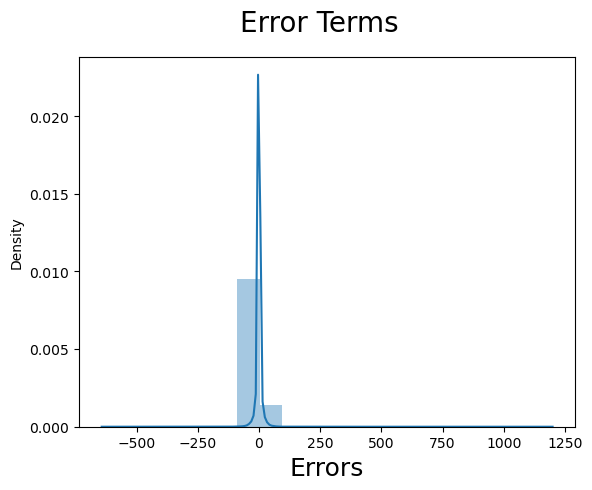

In [41]:
import seaborn as sns
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Using test set

In [43]:
model.score(x_train_lm[required_features], y_train)

0.9999993600117233